# Introduction to Plotting with Python



*   Introduction to pyplot (Matplotlib)
*   Plotting with Pandas
*   Seaborn



### Pyplot and Matplotlib

* `matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. 

* Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

* In matplotlib.pyplot various states are preserved across function calls
* Keeps track of the current figure and plotting area, and the current axes
* "axes" here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis
* Two primary ways of plotting:
    * `pyplot` api
    * object oriented api on `axis` object

#### `pyplot` api

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.arange(20)
y = np.sin(x)

In [ ]:
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849 -0.54402111 -0.99999021
 -0.53657292  0.42016704  0.99060736  0.65028784 -0.28790332 -0.96139749
 -0.75098725  0.14987721]


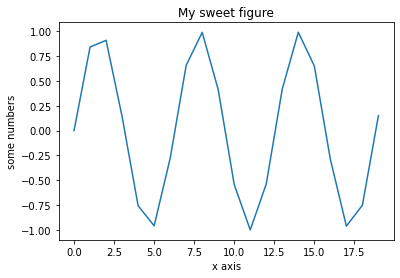

In [ ]:
plt.plot(x, y)
plt.ylabel('some numbers')
plt.xlabel("x axis")
plt.title("My sweet figure")
plt.show()
plt.clf()
plt.close()

##### Formatting Styles

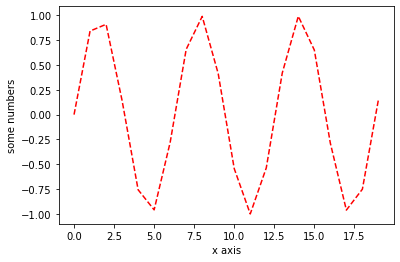

In [ ]:
# linestyle

plt.plot(x, y,  linestyle='--', color='red')
plt.ylabel('some numbers')
plt.xlabel("x axis")
plt.show()

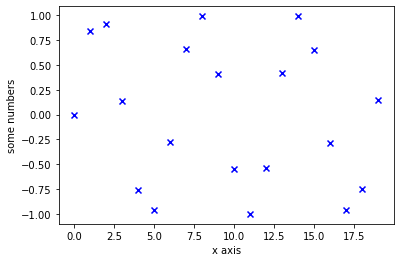

In [ ]:
# changing markers

plt.scatter(x, y, marker='x', color='blue')
plt.ylabel('some numbers')
plt.xlabel("x axis")

#plt.show()
plt.savefig("./example.pdf")

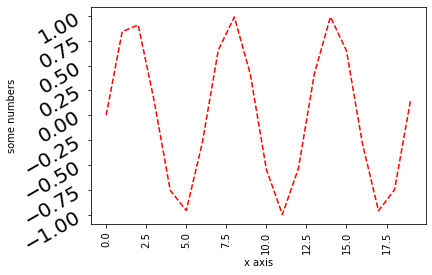

In [ ]:
# changing axis tick marks
plt.plot(x, y,  linestyle='--', color='red')
plt.ylabel('some numbers')
plt.xlabel("x axis")
plt.xticks(rotation=90)
plt.yticks(rotation=30, fontsize=20)
plt.show()

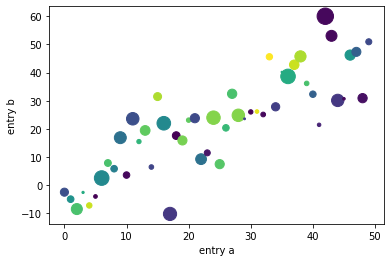

In [ ]:
# Formatting size, color along data dimension

# generate data
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# plotting with keyword strings
# Should also work with pandas dataframes
plt.scatter('a', 'b', c='c', s='d', data=data) # s: size, c: color
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

##### Layering multiple plots


In [ ]:
z = np.cos(x)

In [ ]:
plt.plot(x, y,  linestyle='--', color='red', label='sin(x)')
plt.plot(x, z, linestyle='dotted', color='blue', label='cos(x)') # label used in legend
plt.scatter(x, y, marker='o', color='red')
plt.scatter(x, z, marker='x', color='blue', s=200.0)
plt.ylabel('some numbers')
plt.xlabel("x axis")
plt.legend(loc='best') # turns on legend: choose 'best' location

plt.show()

In [ ]:
## 

#### Object oriented api and `axis` object

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("x axis")  # note these are different methods from above, using plt
ax.set_ylabel("y axis")
plt.show()

##### Multiple figures with `subplot()`

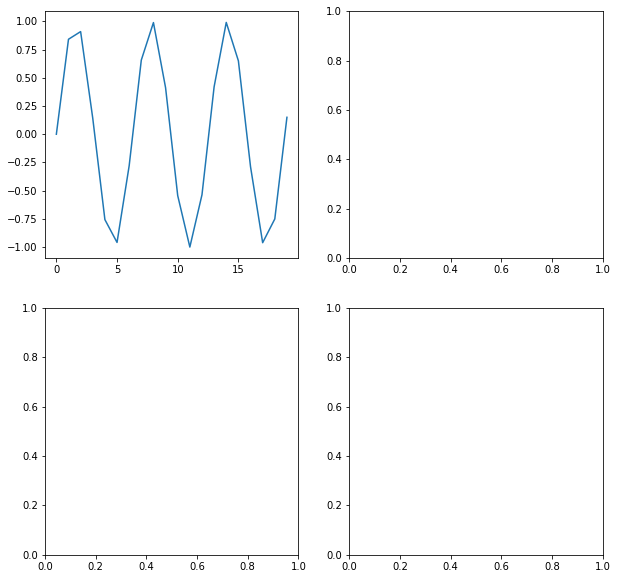

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].plot(x, y)
plt.show()

In [ ]:
y2 = -3.1*x + 10 + np.random.normal(0, 5, len(x))

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

In [ ]:
z2 = f(x)

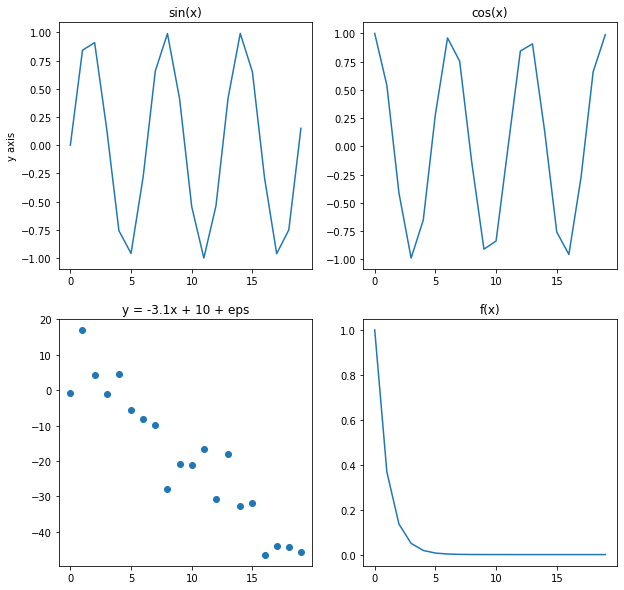

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# axis (0, 0)
ax[0][0].plot(x, y)
ax[0][0].set_ylabel("y axis")
ax[0][0].title.set_text("sin(x)")

# axis (0, 1)
ax[0][1].plot(x, z)
ax[0][1].title.set_text("cos(x)")

# axis (1, 0)
ax[1][0].scatter(x, y2)
ax[1][0].title.set_text("y = -3.1x + 10 + eps")

# axis (1, 1)
ax[1][1].plot(x, z2)
ax[1][1].title.set_text("f(x)")

plt.show()

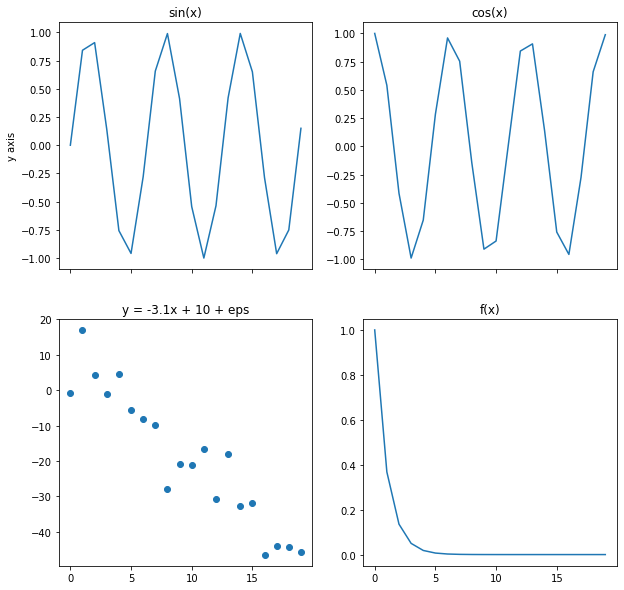

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True)

# axis (0, 0)
ax[0][0].plot(x, y)
ax[0][0].set_ylabel("y axis")
ax[0][0].title.set_text("sin(x)")

# axis (0, 1)
ax[0][1].plot(x, z)
ax[0][1].title.set_text("cos(x)")

# axis (1, 0)
ax[1][0].scatter(x, y2)
ax[1][0].title.set_text("y = -3.1x + 10 + eps")

# axis (1, 1)
ax[1][1].plot(x, z2)
ax[1][1].title.set_text("f(x)")

plt.show()

### Plotting with Pandas


*   Rather than create and modify layers, by passing data to plotting funcitons, we now interact with plotting methods on the data object (DataFrame)
*   More high level. Less flexible, but easier and faster for "standard" plots
*   Primarily used with the `df.plot(kind=str)` method:
      * "area" is for area plots.
      * "bar" is for vertical bar charts.
      * "barh" is for horizontal bar charts.
      * "box" is for box plots.
      * "hexbin" is for hexbin plots.
      * "hist" is for histograms.
      * "kde" is for kernel density estimate charts.
      * "density" is an alias for "kde".
      * "line" is for line graphs.
      * "pie" is for pie charts.
      * `"scatter" is for scatter plots.



In [ ]:
import statsmodels.api as sm
import pandas as pd
df = sm.datasets.get_rdataset('iris').data
df.head()

In [ ]:
df.plot()
plt.show()

In [ ]:
df.groupby("Species").mean().plot(kind='bar')
plt.show()

In [ ]:
df.groupby("Species").mean().plot(kind='barh')
plt.show()

In [ ]:
df.plot(kind='hexbin', x='Sepal.Width', y='Sepal.Length')
plt.show()

In [ ]:
df.plot(kind='kde')
plt.show()

In [ ]:
df.plot(kind='hist', alpha=.5)
plt.show()

### Seaborn



*   Very powerful, high-level plotting api
*   Many useful built-in plots for statistical analysis
*   Emphasis on design and beautiful graphics



In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
sns.kdeplot(data=df, fill=True)
plt.show()

In [ ]:
# violin plot
# similar to boxplot, but uses KDE to infer underlying distribution

sns.violinplot(data=df, fill=True)
plt.show()

In [ ]:
## KDE + Rug plot

# visualize distribution and support of the data

sns.rugplot(x='Sepal.Length', data=df)
sns.kdeplot(x='Sepal.Length', data=df)
plt.show()

In [ ]:
sns.regplot(x='Sepal.Length', y="Petal.Length", data=df)
plt.show()

In [ ]:
# Dendogram or cluster map
# good for hierarchically clustered data

iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)